In [1]:
%matplotlib inline

# Import Matplotlib to plot data 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import the pandas library.
import pandas

# Import the kmeans clustering model.
from sklearn.cluster import KMeans

In [2]:
# Read in the data.
games = pandas.read_csv("games.csv")
# Print the names of the columns in games.
print(games.columns)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [3]:
# No of rows, columns
print(games.shape)

(81312, 20)


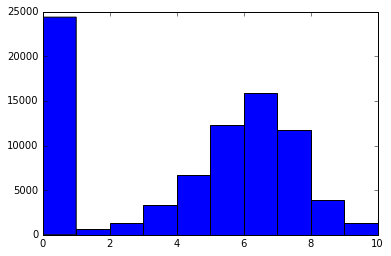

In [4]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [5]:
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [6]:
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [7]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

In [62]:
#Selecting two columns for clustering our data
X=games[["average_rating","users_rated"]]
print X.shape
print type(X)

(56894, 2)
<class 'pandas.core.frame.DataFrame'>


In [63]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=3, random_state=1)
# Fit the model using the good columns.
kmeans_model.fit(X)
# Get the cluster assignments.
labels = kmeans_model.labels_

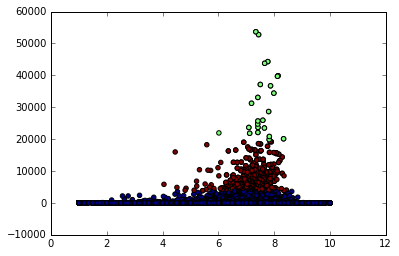

In [64]:
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=X["average_rating"], y=X["users_rated"], c=labels)
# Show the plot.
plt.show()

(56894, 2)
<class 'pandas.core.frame.DataFrame'>


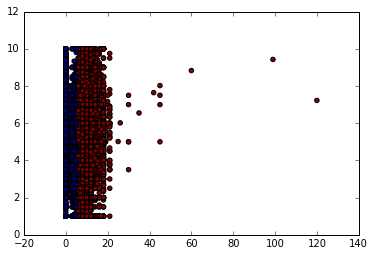

In [71]:
#Try it out with different features

#Selecting two columns for clustering our data
X=games[["minage","average_rating"]]
print X.shape
print type(X)
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=2, random_state=1)
# Fit the model using the good columns
kmeans_model.fit(X)
# Get the cluster assignments.
labels = kmeans_model.labels_
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=X["minage"], y=X["average_rating"], c=labels)
# Show the plot.
plt.show()